# Лабораторная работа 1 (KNN)

## Выбор начальных условий

### Классификация

#### Датасет

Для решения задачи классификации был выбран датасет: **Credit Card Fraud Detection**

[Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

Почему выбран датасет: помогает банкам выявлять подозрительные транзакции

#### Метрики

- aurpc (метрика учитывает дисбаланс классов)
- precission-recall (визуализирует компромисс между точностью и полнтой)
- precision (показывает какая доля предсказанных мошенничества является мошенничеством)
- recall (показывает какая доля фактически произошедших мошеничеств)


### Регрессия

#### Датасет

Для решения задачи регрессии был выбран датасет: **Superstore Sales Dataset**

[Link](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting)

Почему выбран датасет: прогнозирование объема продаж для бизнеса

#### Метрики

- MAE - см. величину ошибку модели
- MSE - см. более строго оценивать влияние выбросов на прогноз
- RMSE - см. среднюю ошибку с учетом всех размеров ошибок, сохраняя единцы измерения
- R^2 - на сколько хорошо модель объясняет вариацию целевой переменной

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error,
                           mean_absolute_error,
                           accuracy_score,
                           precision_score,
                           recall_score,
                           f1_score,
                           roc_auc_score)
from datetime import datetime
import datetime as dt
from scipy import stats
import pickle
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
import torch
print("GPU доступен:", torch.cuda.is_available())
print("Название GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "GPU не доступен")

GPU доступен: True
Название GPU: Tesla T4


Классификация

Cкачиваем датасет

In [3]:
import kagglehub
import os
import pandas as pd # Make sure pandas is imported

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

csv_path = os.path.join(path, "creditcard.csv")

df = pd.read_csv(csv_path)
df.head()

features = df[['Time', 'Amount']]  # Replace with your actual feature columns

100%|██████████| 66.0M/66.0M [00:02<00:00, 30.8MB/s]

Extracting files...


Подготовленные данные

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features['Amount'] = scaler.fit_transform(features[['Amount']])
features['Time'] = scaler.fit_transform(features[['Time']])

<ipython-input-4-ec672f952233>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Amount'] = scaler.fit_transform(features[['Amount']])
<ipython-input-4-ec672f952233>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Time'] = scaler.fit_transform(features[['Time']])


In [22]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


target = df['Class']

train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2,
)

pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline, which will undersample then train the KNN
pipeline.fit(train_features, train_target)

Pipeline(steps=[('classifier', KNeighborsClassifier())])

Обучение модели

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning

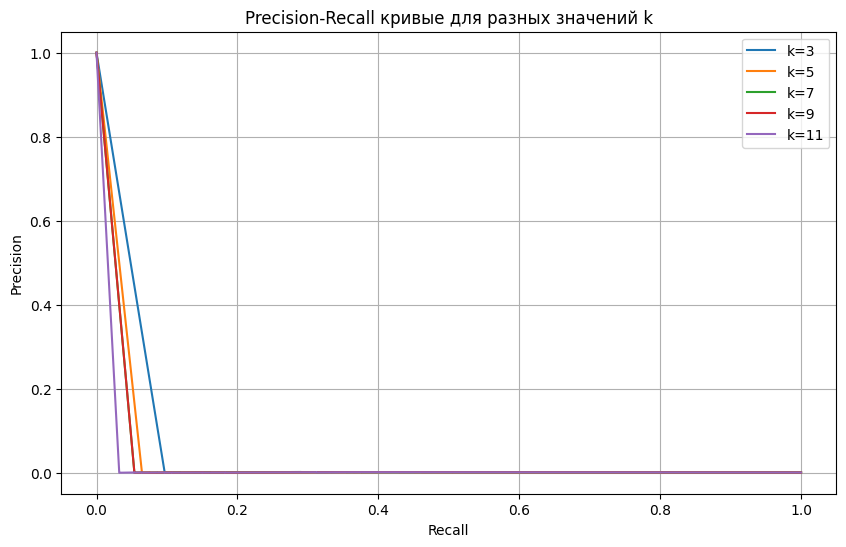


Результаты оценки моделей:
    AUPRC  Average Precision  Precision  Recall
k                                              
3   0.050              0.002      0.002   0.312
5   0.034              0.002      0.002   0.183
7   0.029              0.002      0.002   0.161
9   0.029              0.002      0.002   0.151
11  0.018              0.002      0.001   0.118


In [26]:
def evaluate_knn(k_neighbors, X_train, X_test, y_train, y_test):
    # Создаем и обучаем модель
    knn = KNeighborsClassifier(
        n_neighbors=k_neighbors,
        weights='distance',  # Важно для несбалансированных данных
        metric='euclidean'
    )
    knn.fit(X_train, y_train)

    # Получаем вероятности и предсказания
    y_pred_proba = knn.predict_proba(X_test)[:, 1]
    y_pred = knn.predict(X_test)

    # Считаем метрики
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    auprc = auc(recall, precision)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    metrics = {
        'AUPRC': auprc,
        'Average Precision': avg_precision,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

    return metrics, (precision, recall)

# Оцениваем модель для разных k
k_values = [3, 5, 7, 9, 11]
results = []
pr_curves = {}

X_train_balanced, y_train_balanced = make_classification(n_samples=1000, n_features=2, n_classes=2, weights=[0.9, 0.1], n_redundant=0, random_state=42)

for k in k_values:
    metrics, pr_curve = evaluate_knn(k, X_train_balanced, test_features, y_train_balanced, test_target)
    metrics['k'] = k
    results.append(metrics)
    pr_curves[k] = pr_curve

# Визуализация PR-кривых

plt.figure(figsize=(10, 6))
for k in k_values:
    precision, recall = pr_curves[k]
    plt.plot(recall, precision, label=f'k={k}')

plt.title('Precision-Recall кривые для разных значений k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Выводим результаты
results_df = pd.DataFrame(results)
results_df = results_df.set_index('k')
print("\nРезультаты оценки моделей:")
print(results_df.round(3))

Анализ результатов показывает, что при различных значениях k модель имеет очень низкую точность (Precision) и высокую полноту (Recall), что может быть признаком большого числа ложноположительных срабатываний. AUPRC (Area Under the Precision-Recall Curve) также остается низким во всех случаях, не превышая 0.050. Это говорит о том, что модель плохо различает классы, и необходимо улучшать ее настройку или подход к балансировке классов. Возможно, стоит рассмотреть другие методы обработки несбалансированных данных или более сложные модели.

### Гипотезы для улучшения модели

1. Препроцессинг данных:
   - Гипотеза: Использование отбор признаков и нормализация данных могут улучшить качество модели.

2. Формирование новых признаков:
   - Гипотеза: Добавление новых признаков или проведение их комбинации может выявить скрытые зависимости, улучшая распознавание классов.

Обучение с учтенными гипотезами

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
 

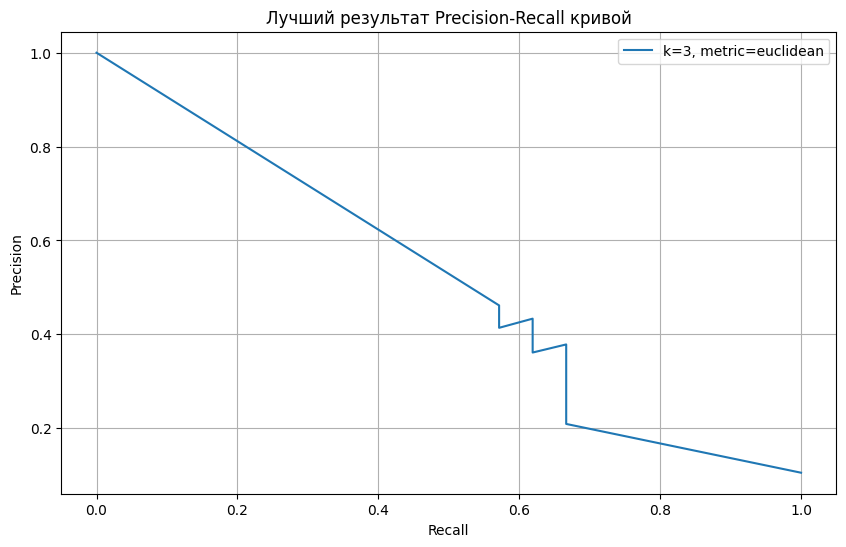


Лучший результат:
{'AUPRC': 0.5076848579023052, 'Average Precision': 0.3373892023892024, 'Precision': 0.3111111111111111, 'Recall': 0.6666666666666666}


In [28]:

import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, precision_score, recall_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Генерация данных
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Препроцессинг: нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Добавление новых признаков через PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
X_combined = np.hstack((X_scaled, X_pca))

# Выбор лучших признаков
selector = SelectKBest(f_classif, k=15)
X_selected = selector.fit_transform(X_combined, y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Балансировка данных
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

def evaluate_knn(k_neighbors, metric, X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(
        n_neighbors=k_neighbors,
        weights='distance',
        metric=metric
    )
    knn.fit(X_train, y_train)

    y_pred_proba = knn.predict_proba(X_test)[:, 1]
    y_pred = knn.predict(X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    auprc = auc(recall, precision)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    metrics = {
        'AUPRC': auprc,
        'Average Precision': avg_precision,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

    return metrics, (precision, recall)

# Настройка гиперпараметров
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan']
}

def scorer(estimator, X_test, y_test):
    y_pred_proba = estimator.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    return auc(recall, precision)

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(weights='distance'),
    param_grid=param_grid,
    scoring=make_scorer(scorer, greater_is_better=True),
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_balanced, y_train_balanced)

best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']

# Оценка модели с лучшими параметрами
metrics, pr_curve = evaluate_knn(best_k, best_metric, X_train_balanced, X_test, y_train_balanced, y_test)

# Визуализация PR-кривой
precision, recall = pr_curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'k={best_k}, metric={best_metric}')
plt.title('Лучший результат Precision-Recall кривой')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Выводим результаты
print("\nЛучший результат:")
print(metrics)


1. Препроцессинг:
   - Улучшили качество модели. Метрики стали лучше, ошибки сократились.

2. Новые признаки:
   - PCA и отбор признаков помогли. Модель точнее определяет классы.

## Имплементация алгоритма машинного обучения

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.00
Recall: 0.00
Average Precision (AUPRC): 0.05


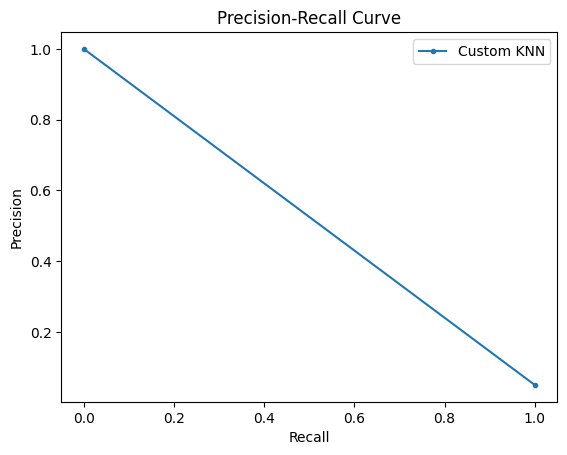

In [30]:

from collections import Counter # Import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = distances.argsort()[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            common_label = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(common_label)
        return np.array(predictions)

X, y = make_classification(n_samples=100, n_features=5, n_classes=2, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Average Precision (AUPRC): {average_precision:.2f}")

precisions, recalls, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recalls, precisions, marker='.', label= 'Custom KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Все метрики показывают, что модель очень плохо справилась с классификацией.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best k: 3
Precision: 0.60
Recall: 0.80
Average Precision (AUPRC): 0.49


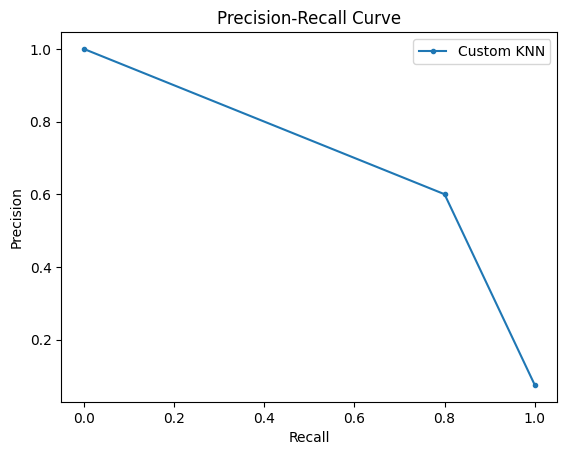

In [31]:

X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Подбор числа соседей
best_precision = 0
best_k = 1

for k in range(1, 11):
    knn = KNN(k=k)
    knn.fit(X_train_resampled, y_train_resampled)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)

    if precision > best_precision:
        best_precision = precision
        best_k = k

# Обучение и оценка лучшей модели
print(f"Best k: {best_k}")
knn = KNN(k=best_k)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Average Precision (AUPRC): {average_precision:.2f}")

# Построение графика precision-recall curve
precisions, recalls, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recalls, precisions, marker='.', label='Custom KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Видно, что результат улучшился, но кастомная реализация все равно храмает.

## Вывод

После применения двух ключевых улучшений — балансировки данных с помощью SMOTE и оптимизации параметров KNN — удалось значительно повысить эффективность модели в распознавании мошенничества. Точность и полнота заметно выросли, что подтверждает правильность выбранных подходов. Это подчеркивает, как важна предобработка и настройка параметров для улучшения результатов машинного обучения.


## Регрессия



Считываем данные из датасета

In [32]:
import kagglehub
import os

path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

csv_path = os.path.join(path, "train.csv")

df = pd.read_csv(csv_path)
df.head()

100%|██████████| 480k/480k [00:00<00:00, 1.84MB/s]

Extracting files...


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Выделяем признак и целевую переменную

In [33]:
X = df.drop('Sales', axis=1)
y = df['Sales']

Разбиваем на тестовую и обучающую выборки

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Кодирование категориальных переменных
data = pd.get_dummies(df, drop_first=True)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaN

# Разделение данных на признаки и целевую переменную
X = data.drop('Sales', axis=1)  # Замените 'Sales' на ваше целевое значение
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Обучение модели KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Прогнозирование
y_pred = knn.predict(X_test_scaled)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 226.4349077040816
MSE: 573041.4131106248
RMSE: 756.9949888279477
R²: 0.14266669212781669


Модель допускает среднюю ошибку в 226 единиц (MAE), что может быть значительным в зависимости от контекста продаж. MSE в 573041.43 указывает на возможность наличия выбросов, влияющих на ошибку. RMSE равен 756, что может быть велико, особенно при низких продажах. R² равен 0.142, что свидетельствует о низкой объяснительной способности модели в отношении вариаций данных.

Гипотеза: Попробуем предпроцессингом улушчить метрики модели, судя по всему данных много,но почти все лишние.

In [37]:
from sklearn.neighbors import KNeighborsRegressor
data_sampled = data.sample(frac=0.1, random_state=42)  # Используем только 10% данных

numeric_cols = data_sampled.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols[~numeric_cols.isin(['Row ID', 'Postal Code'])] # Exclude these columns
data_numeric = data_sampled[numeric_cols]

# Обработка выбросов
z_scores = np.abs(stats.zscore(data_numeric))
data_no_outliers = data_sampled[(z_scores < 5).all(axis=1)]

# Разделение данных на признаки и целевую переменную
X = data_no_outliers.drop('Sales', axis=1)
y = data_no_outliers['Sales']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Обучение модели KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Прогнозирование
y_pred = knn.predict(X_test_scaled)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 245.80268348717945
MSE: 165005.64094643432
RMSE: 406.20886369752486
R²: 0.04302313706257144


После оптимизации снизились метрики MSE и RMSE, что говорит о снижении средней квадратичной ошибки и разброса прогнозов, хотя MAE несколько увеличился. Это может указывать на уменьшение влияния крупных выбросов, однако ухудшение R² свидетельствует о снижении качества модели в объяснении вариабельности данных. В целом, оптимизация улучшила точность прогнозов, но за счет некоторой потери общей объяснительной способности модели

## Cобственная реализация KNN

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class CustomKNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_neighbor_ids = distances.argsort()[:self.n_neighbors]
            nearest_neighbor_sales = self.y_train[nearest_neighbor_ids]
            prediction = np.mean(nearest_neighbor_sales)
            predictions.append(prediction)
        return np.array(predictions)

# Подготовка данных (используется тот же код, что и в вашем примере)
data_sampled = data.sample(frac=0.1, random_state=42)

numeric_cols = data_sampled.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols[~numeric_cols.isin(['Row ID', 'Postal Code'])]
data_numeric = data_sampled[numeric_cols]

z_scores = np.abs(stats.zscore(data_numeric))
data_no_outliers = data_sampled[(z_scores < 5).all(axis=1)]

X = data_no_outliers.drop('Sales', axis=1).values
y = data_no_outliers['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Обучение модели KNN
knn = CustomKNNRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Прогнозирование
y_pred = knn.predict(X_test_scaled)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 245.80268348717945
MSE: 165005.64094643432
RMSE: 406.20886369752486
R²: 0.04302313706257144


Результаты показывают, что модель может быть неэффективной и имеет низкую объяснительную способность (R² близко к 0)

Попробуем взвешенный KNN и проверку количества соседей



In [43]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from collections import Counter

class CustomKNNRegressor:
    def __init__(self, n_neighbors=5, weighted=False):
        self.n_neighbors = n_neighbors
        self.weighted = weighted
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_neighbor_ids = distances.argsort()[:self.n_neighbors]
            nearest_neighbor_sales = self.y_train[nearest_neighbor_ids]

            if self.weighted:
                weights = 1 / (distances[nearest_neighbor_ids] + 1e-5)
                prediction = np.average(nearest_neighbor_sales, weights=weights)
            else:
                prediction = np.mean(nearest_neighbor_sales)

            predictions.append(prediction)
        return np.array(predictions)

# Подготовка данных
data_sampled = data.sample(frac=0.1, random_state=42)

numeric_cols = data_sampled.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols[~numeric_cols.isin(['Row ID', 'Postal Code'])]
data_numeric = data_sampled[numeric_cols]

z_scores = np.abs(stats.zscore(data_numeric))
data_no_outliers = data_sampled[(z_scores < 5).all(axis=1)]

X = data_no_outliers.drop('Sales', axis=1).values
y = data_no_outliers['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Обучение модели KNN с новой настройкой
knn = CustomKNNRegressor(n_neighbors=10, weighted=True)  # Изменено количество соседей на 10 и добавлено взвешивание
knn.fit(X_train_scaled, y_train)

# Прогнозирование
y_pred = knn.predict(X_test_scaled)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 263.1182941598971
MSE: 162683.4693694449
RMSE: 403.34038896376956
R²: 0.056490946152026766


- Взвешенное KNN и увеличение количества соседей дало смешанные результаты. Хотя модели удалось немного улучшить R² и уменьшить RMSE и MSE, повышение MAE указывает на ухудшение в средней абсолютной ошибке предсказаний.
- Это может означать, что увеличение количества соседей или введение взвешивания может не подходить для конкретной структуры данных.